**Notice:**

In this notebook, all progresses (train, eval, export and inference) should be conducted on the same `paddlepaddle-gpu` version

In [1]:
!nvidia-smi

Wed Nov 26 09:35:42 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.172.08             Driver Version: 570.172.08     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              8W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!python --version

Python 3.11.13


In [3]:
!pip install -q paddlepaddle-gpu==3.0.0 -i https://www.paddlepaddle.org.cn/packages/stable/cu126/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 GB 826.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip show paddlepaddle-gpu

Name: paddlepaddle-gpu
Version: 3.0.0
Summary: Parallel Distributed Deep Learning
Home-page: https://www.paddlepaddle.org.cn/
Author: 
Author-email: Paddle-better@baidu.com
License: Apache Software License
Location: /usr/local/lib/python3.11/dist-packages
Requires: astor, decorator, httpx, networkx, numpy, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, opt_einsum, Pillow, protobuf, typing_extensions
Required-by: 


In [5]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 300154, done.
remote: Counting objects: 100% (2353/2353), done.
remote: Compressing objects: 100% (535/535), done.
remote: Total 300154 (delta 2073), reused 1874 (delta 1818), pack-reused 297801 (from 4)
Receiving objects: 100% (300154/300154), 1.58 GiB | 30.91 MiB/s, done.
Resolving deltas: 100% (237218/237218), done.


In [6]:
!wget https://paddle-model-ecology.bj.bcebos.com/paddlex/official_pretrained_model/PP-OCRv5_mobile_rec_pretrained.pdparams

--2025-11-26 09:44:05--  https://paddle-model-ecology.bj.bcebos.com/paddlex/official_pretrained_model/PP-OCRv5_mobile_rec_pretrained.pdparams
Resolving paddle-model-ecology.bj.bcebos.com (paddle-model-ecology.bj.bcebos.com)... 103.235.47.176, 2402:2b40:7000:628:0:ff:b0e8:88da
Connecting to paddle-model-ecology.bj.bcebos.com (paddle-model-ecology.bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133890015 (128M) [application/octet-stream]
Saving to: ‘PP-OCRv5_mobile_rec_pretrained.pdparams’

PP-OCRv5_mobile_rec 100%[===================>] 127.69M  15.8MB/s    in 11s     

2025-11-26 09:44:17 (12.2 MB/s) - ‘PP-OCRv5_mobile_rec_pretrained.pdparams’ saved [133890015/133890015]



In [7]:
# PP-OCRv5_mobile_rec.yml

config = '''
Global:
  model_name: PP-OCRv5_mobile_rec # To use static model for inference.
  debug: false
  use_gpu: true
  epoch_num: 40
  log_smooth_window: 20
  print_batch_step: 10
  save_model_dir: ./output/PP-OCRv5_mobile_rec
  save_epoch_step: 10
  eval_batch_step: [0, 800]
  cal_metric_during_train: true
  pretrained_model:
  checkpoints:
  save_inference_dir:
  use_visualdl: false
  infer_img: doc/imgs_words/ch/word_1.jpg
  character_dict_path: /kaggle/input/rec-merged-data/vi_dict.txt
  max_text_length: &max_text_length 40
  infer_mode: false
  use_space_char: true
  distributed: true
  save_res_path: ./output/rec/predicts_ppocrv5.txt
  d2s_train_image_shape: [3, 48, 320]


Optimizer:
  name: Adam
  beta1: 0.9
  beta2: 0.999
  lr:
    name: Cosine
    learning_rate: 0.0003
    warmup_epoch: 5
  regularizer:
    name: L2
    factor: 3.0e-05


Architecture:
  model_type: rec
  algorithm: SVTR_LCNet
  Transform:
  Backbone:
    name: PPLCNetV3
    scale: 0.95
  Head:
    name: MultiHead
    head_list:
      - CTCHead:
          Neck:
            name: svtr
            dims: 120
            depth: 2
            hidden_dims: 120
            kernel_size: [1, 3]
            use_guide: True
          Head:
            fc_decay: 0.00001
      - NRTRHead:
          nrtr_dim: 384
          max_text_length: *max_text_length

Loss:
  name: MultiLoss
  loss_config_list:
    - CTCLoss:
    - NRTRLoss:

PostProcess:  
  name: CTCLabelDecode

Metric:
  name: RecMetric
  main_indicator: acc
  ignore_space: false

Train:
  dataset:
    name: MultiScaleDataSet
    ds_width: false
    data_dir: /kaggle/input/rec-merged-data
    ext_op_transform_idx: 1
    label_file_list:
    - /kaggle/input/rec-merged-data/train_labels.txt
    transforms:
    - DecodeImage:
        img_mode: BGR
        channel_first: false
    - RecConAug:
        prob: 0.5
        ext_data_num: 2
        image_shape: [48, 320, 3]
        max_text_length: *max_text_length
    - RecAug:
    - MultiLabelEncode:
        gtc_encode: NRTRLabelEncode
    - KeepKeys:
        keep_keys:
        - image
        - label_ctc
        - label_gtc
        - length
        - valid_ratio
  sampler:
    name: MultiScaleSampler
    scales: [[320, 32], [320, 48], [320, 64]]
    first_bs: &bs 64
    fix_bs: false
    divided_factor: [8, 16] # w, h
    is_training: True
  loader:
    shuffle: true
    batch_size_per_card: *bs
    drop_last: true
    num_workers: 8
Eval:
  dataset:
    name: SimpleDataSet
    data_dir: /kaggle/input/rec-merged-data
    label_file_list:
    - /kaggle/input/rec-merged-data/test_labels.txt
    transforms:
    - DecodeImage:
        img_mode: BGR
        channel_first: false
    - MultiLabelEncode:
        gtc_encode: NRTRLabelEncode
    - RecResizeImg:
        image_shape: [3, 48, 320]
    - KeepKeys:
        keep_keys:
        - image
        - label_ctc
        - label_gtc
        - length
        - valid_ratio
  loader:
    shuffle: false
    drop_last: false
    batch_size_per_card: 64
    num_workers: 4
'''

config_path = "/kaggle/working/custom_config.yml"

with open(config_path, 'w', encoding = "utf-8") as f:
    f.write(config)

In [8]:
%cd /kaggle/working/PaddleOCR
!pip install -r requirements.txt -q

/kaggle/working/PaddleOCR
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.1/295.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 72.9 MB/s eta 0:00:00


In [9]:
# Multi-GPU training, specify GPU IDs via the --gpus parameter
print('model is being trained now')
print('='*40)

!python -m paddle.distributed.launch --gpus '0,1'  tools/train.py -c /kaggle/working/custom_config.yml \
        -o Global.pretrained_model=/kaggle/working/PP-OCRv5_mobile_rec_pretrained.pdparams

model is being trained now
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
LAUNCH INFO 2025-11-26 09:44:27,102 -----------  Configuration  ----------------------
LAUNCH INFO 2025-11-26 09:44:27,102 auto_cluster_config: 0
LAUNCH INFO 2025-11-26 09:44:27,102 auto_parallel_config: None
LAUNCH INFO 2025-11-26 09:44:27,102 auto_tuner_json: None
LAUNCH INFO 2025-11-26 09:44:27,102 devices: 0,1
LAUNCH INFO 2025-11-26 09:44:27,102 elastic_level: -1
LAUNCH INFO 2025-11-26 09:44:27,102 elastic_timeout: 30
LAUNCH INFO 2025-11-26 09:44:27,102 enable_gpu_log: True
LAUNCH INFO 2025-11-26 09:44:27,102 gloo_port: 6767
LAUNCH INFO 2025-11-26 09:44:27,102 host: None
LAUNCH INFO 2025-11-26 09:44:27,102 ips: None
LAUNCH INFO 2025-11-26

In [10]:
print('training process is done')
print('='*40)

training process is done


In [11]:
!python tools/eval.py -c /kaggle/working/custom_config.yml \
    -o Global.pretrained_model=/kaggle/working/PaddleOCR/output/PP-OCRv5_mobile_rec/best_accuracy.pdparams \
    Eval.dataset.data_dir=/kaggle/input/rec-merged-data \
    Eval.dataset.label_file_list='[/kaggle/input/rec-merged-data/unseen_labels.txt]'

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Skipping import of the encryption module.
[2025/11/26 13:54:19] ppocr INFO: Architecture : 
[2025/11/26 13:54:19] ppocr INFO:     Backbone : 
[2025/11/26 13:54:19] ppocr INFO:         name : PPLCNetV3
[2025/11/26 13:54:19] ppocr INFO:         scale : 0.95
[2025/11/26 13:54:19] ppocr INFO:     Head : 
[2025/11/26 13:54:19] ppocr INFO:         head_list : 
[2025/11/26 13:54:19] ppocr INFO:             CTCHead : 
[2025/11/26 13:54:19] ppocr INFO:                 Head : 
[2025/11/26 13:54:19] ppocr INFO:                     fc_decay : 1e-05
[2025/11/26 13:54:19] ppocr INFO:                 Neck : 
[2025/11/26 13:54:19] ppocr INFO:                     depth : 2
[2025/11/26 

# export

In [12]:
!python tools/export_model.py -c /kaggle/working/custom_config.yml -o \
    Global.pretrained_model=/kaggle/working/PaddleOCR/output/PP-OCRv5_mobile_rec/best_accuracy.pdparams \
    Global.save_inference_dir="./PP-OCRv5_mobile_rec_infer"

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Skipping import of the encryption module.
W1126 13:55:37.505621 11143 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.8, Runtime API Version: 12.6
W1126 13:55:37.506682 11143 gpu_resources.cc:164] device: 0, cuDNN Version: 9.5.
[2025/11/26 13:55:38] ppocr INFO: load pretrain successful from /kaggle/working/PaddleOCR/output/PP-OCRv5_mobile_rec/best_accuracy
[2025/11/26 13:55:38] ppocr INFO: Export inference config file to ./PP-OCRv5_mobile_rec_infer/inference.yml
Skipping import of the encryption module
[2025/11/26 13:55:41] ppocr INFO: inference model is saved to ./PP-OCRv5_mobile_rec_infer/inference


# inference

In [13]:
!pip install -qqq paddleocr==3.2.0
!pip show paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.4/390.4 kB 26.2 MB/s eta 0:00:00
Name: paddleocr
Version: 3.2.0
Summary: Awesome mul

In [14]:
from paddleocr import PaddleOCR

In [15]:
# !pip install -q paddlepaddle

In [16]:
ocr_pretrain_det_virec = PaddleOCR(
    use_textline_orientation=False,
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    text_detection_model_name='PP-OCRv5_mobile_det',
    text_recognition_model_name="PP-OCRv5_mobile_rec",
    text_recognition_model_dir='/kaggle/working/PaddleOCR/PP-OCRv5_mobile_rec_infer',
)

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_mobile_det', None)
Using official model (PP-OCRv5_mobile_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_mobile_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

Creating model: ('PP-OCRv5_mobile_rec', '/kaggle/working/PaddleOCR/PP-OCRv5_mobile_rec_infer')


In [17]:
import paddle
paddle.is_compiled_with_cuda()

True

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def test_pipeline(ocr_pipeline, img_path, pipeline_name):
    print(f'{pipeline_name}:')
    print('*'*20)
    
    result = ocr_pipeline.predict(img_path)
    print(result[0]['rec_texts'])
    
    img = cv2.imread(img_path)
    dt_polys = result[0]['dt_polys']
    
    for poly in dt_polys:
        pts = poly.astype(np.int32)
        cv2.polylines(img, [pts], isClosed=True, color=(255, 0, 0), thickness=1)
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [19]:
%cd /kaggle/working/

/kaggle/working


In [20]:
!wget https://hanoiadv.com/wp-content/uploads/2025/02/bien-tap-hoa-4.jpg

--2025-11-26 13:56:21--  https://hanoiadv.com/wp-content/uploads/2025/02/bien-tap-hoa-4.jpg
Resolving hanoiadv.com (hanoiadv.com)... 45.252.251.52
Connecting to hanoiadv.com (hanoiadv.com)|45.252.251.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78829 (77K) [image/jpeg]
Saving to: ‘bien-tap-hoa-4.jpg’

bien-tap-hoa-4.jpg  100%[===================>]  76.98K   188KB/s    in 0.4s    

2025-11-26 13:56:23 (188 KB/s) - ‘bien-tap-hoa-4.jpg’ saved [78829/78829]



pretrain_det_virec:
********************
['HANOIADV', 'HÀNG TẠP HOA', 'CỬA', 'PHƯƠNG', 'TUẤN', 'Lô 7 Chợ Hòà Cường Bắc, Hải Châu, TP. Đà Nẵng - ĐT: 01683 84O 271']


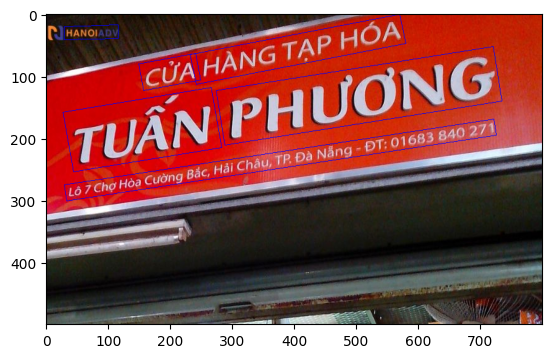

In [21]:
test_path = '/kaggle/working/bien-tap-hoa-4.jpg'
test_pipeline(ocr_pretrain_det_virec, test_path, 'pretrain_det_virec')